# Sales Performance Analysis

## Overview

The goal of this analysis was to gain insights into the sales performance of a company based on a dataset containing information on the products sold, the time of purchase, and the location of the sale. The analysis aimed to answer questions such as the most popular products, the best time for advertising, the most successful sales months, and the cities with the highest number of sales.

## Questions Explored

The analysis explored the following questions:

- What products were the most popular over the year, and what factors might have contributed to their popularity?
- What city had the highest number of sales?
- What time should we display advertisements to maximize sales?
- What products are most often sold together?
- What product sold the most? (Quantity vs Price)

(Findings and recommendations are attached to the end of each section)

## 1 - Importing necessary libraries, dataframe setup and description

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

### Merging 12 months of sales data into a single CSV file

In [2]:
df = pd.read_csv("C:/Users/guill/Desktop/Sales Analysis/Sales_April_2019.csv")

files = [file for file in os.listdir("C:/Users/guill/Desktop/Sales Analysis/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/Users/guill/Desktop/Sales Analysis/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)


### Reading updated dataframe 

In [3]:
alldata = pd.read_csv("all_data.csv")

alldata.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
print("Total number of rows", len(alldata))


Total number of rows 186850


## 2 - Data Cleaning / Augmenting with additional columns

### Removing NaN


In [5]:
nan_df = alldata[alldata.isna().any(axis=1)]

nan_df.head()

alldata = alldata.dropna(how="all")

print("Total number of rows without NaN", len(alldata))


Total number of rows without NaN 186305


### Removing headers from concatenated files


In [6]:
header_df = alldata[alldata["Order Date"].str[0:2] == "Or"]

alldata = alldata[alldata["Order Date"].str[0:2] != "Or"]

print("Total number of rows without duplicate headers", len(alldata))


Total number of rows without duplicate headers 185950


### Adding month column (Convert to int32)


In [7]:
# Check for missing values in 'Order Date'
if alldata['Order Date'].isnull().values.any():
    print('There are missing values in the Order Date column.')

# Convert 'Order Date' to string
alldata['Order Date'] = alldata['Order Date'].astype(str)

# Extract month and convert to integer
alldata['Month'] = alldata['Order Date'].str[0:2].astype(int)

# Preview the first few rows
alldata.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Adding sales column (convert Quantity Ordered to int32 and Price Each to float)

In [8]:
alldata["Quantity Ordered"] = pd.to_numeric(alldata["Quantity Ordered"])

alldata["Price Each"] = pd.to_numeric(alldata["Price Each"])

alldata["Sales"] = alldata["Quantity Ordered"] * alldata["Price Each"]

alldata.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Adding city column

In [9]:
alldata["City"] = alldata["Purchase Address"].apply(lambda x: x.split(",")[1] + " " + x.split(",")[2].split(" ")[1])

alldata.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


## 3 - Exploring the data 

### What was the best month for sales? How much was earned that month?


In [10]:
resultsMonth = alldata.groupby("Month").sum()

resultsMonth


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


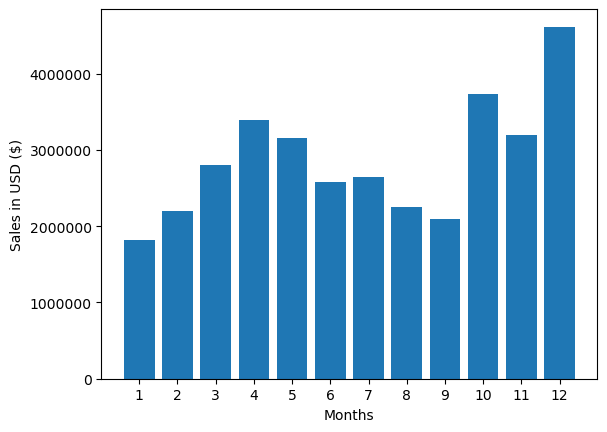

In [11]:
plt.bar(resultsMonth.index, resultsMonth["Sales"])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,100))
plt.xticks(resultsMonth.index)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Months")
plt.show()


#### Results

Based on the analysis of the dataset, the best month for sales was December with a total sales revenue of $4,613,443.34. This is likely due to the holiday season and increased consumer spending. To capitalize on this trend, we can consider increasing  advertising efforts and offering promotions or deals during the holiday season to further drive sales.

### What city had the highest number of sales?

In [12]:
resultsCity = alldata.groupby("City").sum()

resultsCity


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


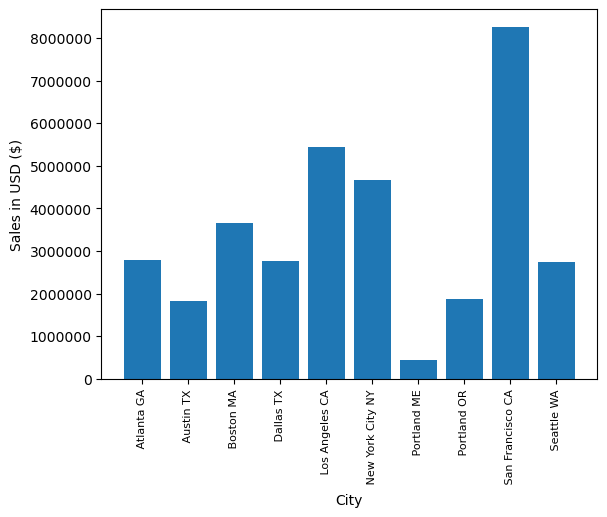

In [13]:
cities = [city for city, df in alldata.groupby("City")]

plt.bar(cities, resultsCity["Sales"])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,100))
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City")
plt.show()


#### Results

By a large margin, the city with the highest number of sales was San Francisco. This could be due to the higher population and economic activity in the area.

For cities with lower sales, we can consider increasing marketing efforts in these areas to raise awareness about products and services. Offering promotions or discounts in these cities could also help to incentivize customers to make purchases.

For cities with higher sales, we should focus on maintaining and improving customer satisfaction. This could include offering exceptional customer service, expanding product offerings, and creating a loyalty program to reward repeat customers.

Additionally, analyzing the demographics and buying habits of customers in these cities can provide valuable insights for tailoring marketing strategies and product offerings to better meet their needs and preferences.

### What time should we display advertisements to maximize sales?

In [14]:
alldata["CleanOrderDate"] = pd.to_datetime(alldata["Order Date"])

alldata.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,CleanOrderDate
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00


In [15]:
alldata["Hour"] = alldata["CleanOrderDate"].dt.hour

alldata["Minute"] = alldata["CleanOrderDate"].dt.minute

alldata.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,CleanOrderDate,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00,9,27


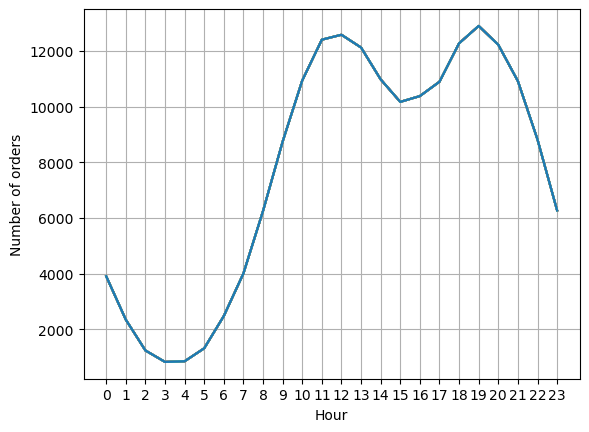

In [16]:
resultshour = [hour for hour, df in alldata.groupby("Hour")]

plt.plot(resultshour, alldata.groupby(["Hour"]).count())
plt.xticks(resultshour)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of orders")
plt.show()


#### Results

By looking at the resulting chart, we can see which hours of the day have the highest sales (between 11am and 7pm). Based on this data, we can recommend displaying advertisements during the peak sales hours to maximize sales.

### What products are most often sold together?

In [17]:
# Referenced https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

df = alldata[alldata["Order ID"].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()

df.head()


C:\Users\guill\AppData\Local\Temp\ipykernel_8604\2056953693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [18]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)


[(('iPhone', ' Lightning Charging Cable'), 1005),
 (('Google Phone', ' USB-C Charging Cable'), 987),
 (('iPhone', ' Wired Headphones'), 447),
 (('Google Phone', ' Wired Headphones'), 414),
 (('Vareebadd Phone', ' USB-C Charging Cable'), 361),
 (('iPhone', ' Apple Airpods Headphones'), 360),
 (('Google Phone', ' Bose SoundSport Headphones'), 220),
 (('Vareebadd Phone', ' Wired Headphones'), 143),
 ((' USB-C Charging Cable', ' Wired Headphones'), 120),
 (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]

#### Results

Based on the analysis, we found that the most commonly sold together products were 'iPhone' and 'Lightning Charging Cable'. Therefore, we recommend bundling these two products and offering them as a package deal to customers. Additionally, we suggest exploring bundling other frequently co-purchased items as a way to drive up sales and increase customer satisfaction.

### What product sold the most? (Quantity vs Price)


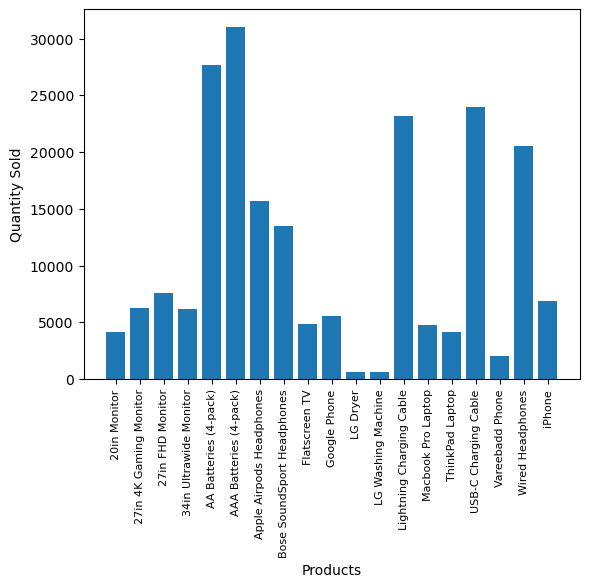

In [19]:
resultsbestsellers = alldata.groupby("Product")

bestsellers = resultsbestsellers.sum()["Quantity Ordered"]

products = [product for product, df in resultsbestsellers]

plt.bar(products, bestsellers)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,100))
plt.xticks(products, rotation="vertical", size=8)
plt.ylabel("Quantity Sold")
plt.xlabel("Products")
plt.show()


C:\Users\guill\AppData\Local\Temp\ipykernel_8604\1541217879.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\guill\AppData\Local\Temp\ipykernel_8604\1541217879.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


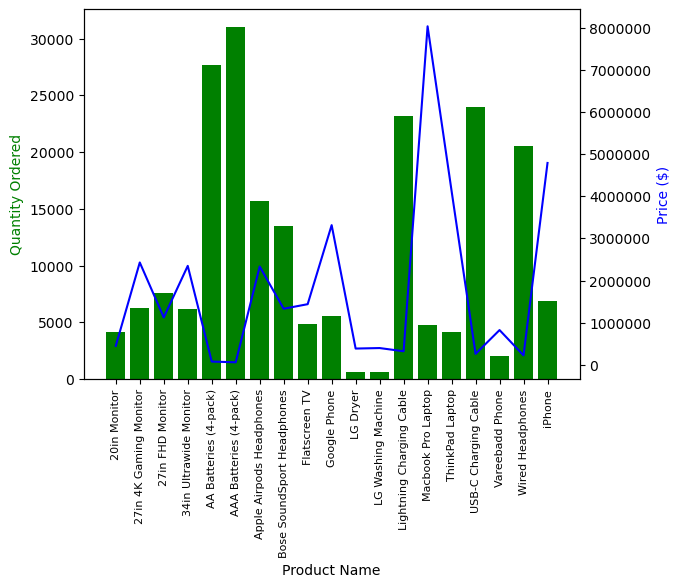

In [24]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = alldata.groupby('Product')['Price Each'].sum()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, bestsellers, color='g')
ax2.plot(products, prices, color='b')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,100))

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Total Sales ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()


#### Results

According to this analysis, the top-selling product was the MacBook Pro Laptop, followed by the iPhone and the ThinkPad Laptop. Other popular products included the Google Phone, 27in 4K Gaming Monitor, and 34in Ultrawide Monitor.

There are likely many factors that contributed to the popularity of these products, including product quality, brand recognition, marketing efforts, and consumer demand. Further analysis could be done to explore these factors in more detail and identify opportunities for future growth.